In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/fraud_detection.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df=df.drop(columns=["nameOrig","nameDest","isFlaggedFraud","step"])

In [5]:
df.shape

(1048575, 7)

In [6]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

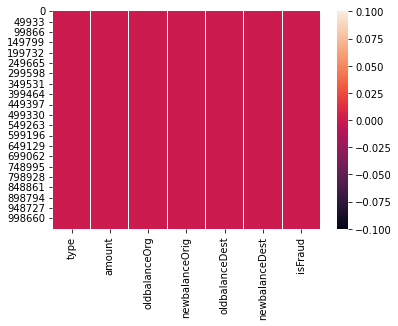

In [7]:
# NULL VALUES
sns.heatmap(df.isnull())

There is no Null value

In [8]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


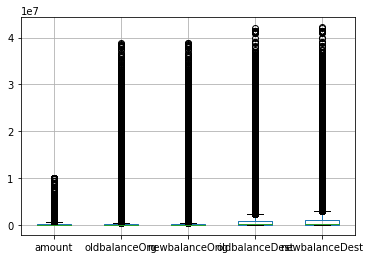

In [9]:
df.boxplot(column=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"])

There are Outliers but in real world these patterns are possible so we are not going to delete it

DATA VISUVALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


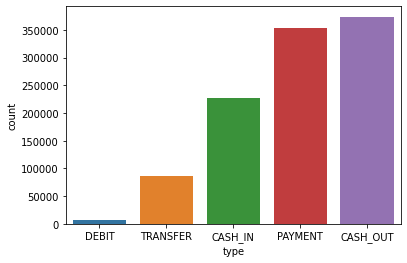

In [10]:
sns.countplot(df["type"],order=df['type'].value_counts(ascending=True).index)

"PAYMENT" and "CASH_OUT" are mostly prefered by people

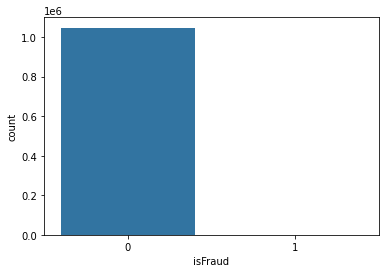

In [11]:
sns.countplot(x=df["isFraud"])

The data is IMBALANCED

In [12]:
fraud=df[df["isFraud"]==1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


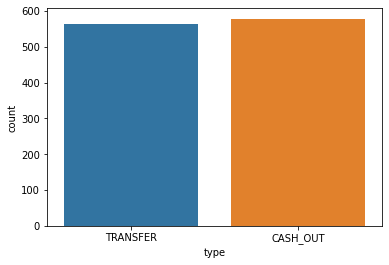

In [13]:
sns.countplot(fraud["type"])

Most of the Fraud transaction is detected in "TRANSFER" and "CASHOUT" type

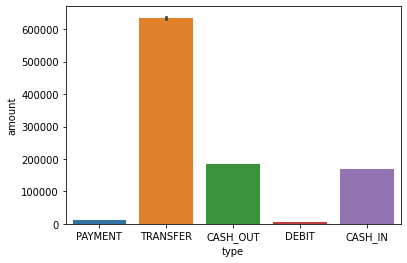

In [14]:
sns.barplot(x=df["type"],y=df["amount"])

Most of the Fraud transaction is done in "TRANSFER" and "CASHOUT" type because huge amount is dealed in TRANSFER type and in CASHOUT type use a technique called "skimmer" 

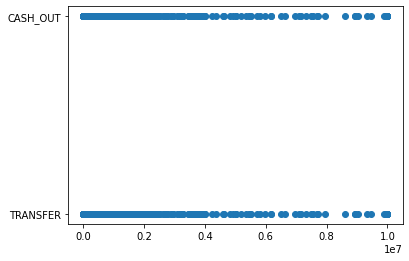

In [15]:
plt.scatter(y=fraud["type"],x=fraud["amount"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


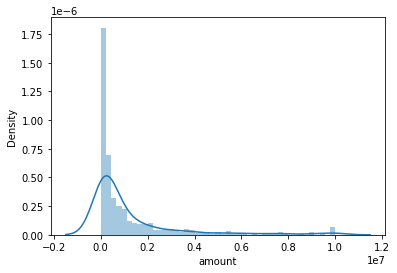

In [16]:
sns.distplot(fraud["amount"])

Mostly small amounts are only misused

ONE HOT ENCODING

In [17]:
dummies=pd.get_dummies(df["type"])

In [18]:
df=pd.concat([df,dummies],axis=1)
df=df.drop(columns="type")

In [19]:
x=df.drop(columns=["isFraud"])
y=df["isFraud"]

BALANCING THE DATA

In [20]:
import imblearn
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
x_bal,y_bal=smt.fit_resample(x,y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


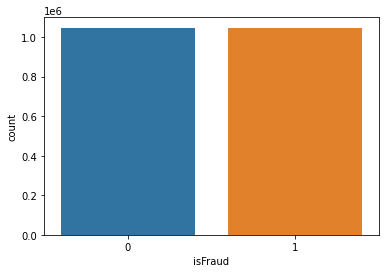

In [21]:
sns.countplot(y_bal)

SCALING

In [22]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_bal=s.fit_transform(x_bal)
x_bal=s.fit_transform(x_bal)

SPLITTING

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.2)


MODEL

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9627357071572845

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for i in range(10,20):
  dt=DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train,y_train)
  cv=cross_val_score(dt,x_train,y_train,cv=10)
  print("accuracy: ",lr.score(x_test,y_test),"cv",cv.mean())
  

accuracy:  0.9627357071572845 cv 0.9918967827757849
accuracy:  0.9627357071572845 cv 0.9932743775694425
accuracy:  0.9627357071572845 cv 0.9946692815946806
accuracy:  0.9627357071572845 cv 0.9955872799571006
accuracy:  0.9627357071572845 cv 0.9963817250724227
accuracy:  0.9627357071572845 cv 0.9970717160234281
accuracy:  0.9627357071572845 cv 0.9976286031955338
accuracy:  0.9627357071572845 cv 0.9979401736142026
accuracy:  0.9627357071572845 cv 0.9982380157221113
accuracy:  0.9627357071572845 cv 0.998396785345047


In [27]:
dt=DecisionTreeClassifier(max_depth=19)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=19)

In [33]:
y_pred=dt.predict(x_test)

In [34]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9984902061869189

DecesionTree gives the best score 0.998

Predicton

In [43]:
new_data=[[1000,30000,29000,4590,5590,0,0,1,0,0],[50000,800000,750000,5000,55000,1,0,0,0,0],[1000000,250390,204930,2000000,3000000,0,1,1,0,0]]
for i in new_data:
  y_pred=dt.predict([i])
  if y_pred==[0]:
    print("Not Fraud")
  else:
    print("Fraud")  


Not Fraud
Not Fraud
Not Fraud
